In [27]:
import pandas as pd
from matplotlib import pyplot as plt

Load tables with high popularity songs (songs with popularity score greater than 68) and low popularity songs (songs with popularity score lower than 68)

In [25]:
high_popularity = pd.read_csv('high_popularity_spotify_data.csv')

low_popularity = pd.read_csv('low_popularity_spotify_data.csv')
songs_df = pd.concat([high_popularity, low_popularity], ignore_index=True)
songs_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0.0,6.0,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1.0,2.0,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4.0,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1.0,1.0,166300.0,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4.0,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0.0,0.0,157280.0,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4.0,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0.0,0.0,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [21]:
num_of_songs, num_of_features = songs_df.shape
print(f'Number of features: {num_of_features} \nNumber of songs: {num_of_songs}')
features = list(songs_df.columns)


Number of features: 29 
Number of songs: 4831


In [24]:
feature_description = ['A measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy', 'The speed of a track, measured in beats per minute (BPM)', 'A score describing how suitable a track is for dancing based on tempo, rhythm stability, beat strength and overall regularity', 'The main genre associated with the playlist (e.g., pop, rock, classical)', 'The overall loudness of a track in decibels (dB). Higher values indicate louder tracks overall', 'The likelihood of a track being performed live. Higher values suggest more audience presence', 'The overall musical positiveness(emotion) of a track. High valence sounds happy; low valence sounds sad or angry', 'The artist(s) performing the track', 'time signature', 'Measures the presence of spoken words', 'A score (0–100) which is calculated based on total number of streams in relation to other songs', 'track_href', 'uri', 'The album in which the track is featured', 'The name of the playlist where the track is included', 'analysis_url', 'A unique identifier assigned to the track by Spotify', 'The name of the track', 'The release date of the album containing the track', 'The likelihood a track contains no vocals. Values closer to 1.0 suggest solely instrumental tracks', 'A unique identifier for the album', 'Indicates the modality of the track', 'The musical key, represented as an integer from 0 to 11, mapping to standard Pitch class notation', 'The length of the track in milliseconds', 'A confidence measure of whether a track is acoustic(1) or not(0)', 'ID', 'A more specific subgenre tied to the playlist (e.g., indie pop, punk rock)', 'type', 'A unique identifier for the playlist']

feature_table = pd.DataFrame({
    'Feature': songs_df.columns,
    'Datentyp': songs_df.dtypes.values,
    'Beschreibung': feature_description  # Hier kannst du manuell deine Beschreibungen eintragen
})
feature_table

,Feature,Datentyp,Beschreibung
0,energy,float64,A measure of intensity and activity. Typically...
1,tempo,float64,"The speed of a track, measured in beats per mi..."
2,danceability,float64,A score describing how suitable a track is for...
3,playlist_genre,object,The main genre associated with the playlist (e...
4,loudness,float64,The overall loudness of a track in decibels (d...
5,liveness,float64,The likelihood of a track being performed live...
6,valence,float64,The overall musical positiveness(emotion) of a...
7,track_artist,object,The artist(s) performing the track
8,time_signature,float64,time signature
9,speechiness,float64,Measures the presence of spoken words


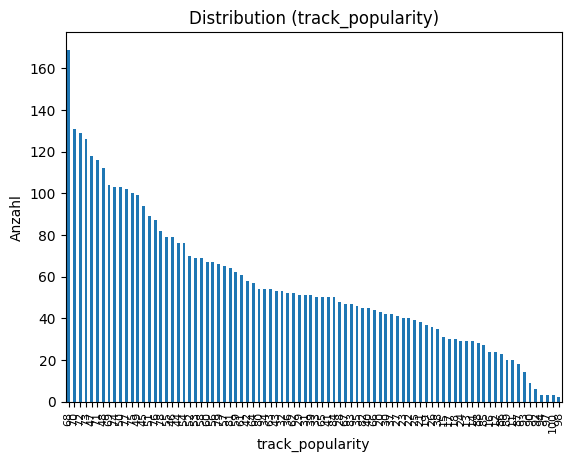

In [31]:
songs_df['track_popularity'].value_counts().plot(kind='bar', title=f'Distribution ({'track_popularity'})')
plt.xlabel('track_popularity')
plt.ylabel('Anzahl')
plt.xticks(rotation=90, fontsize=8)
plt.show()

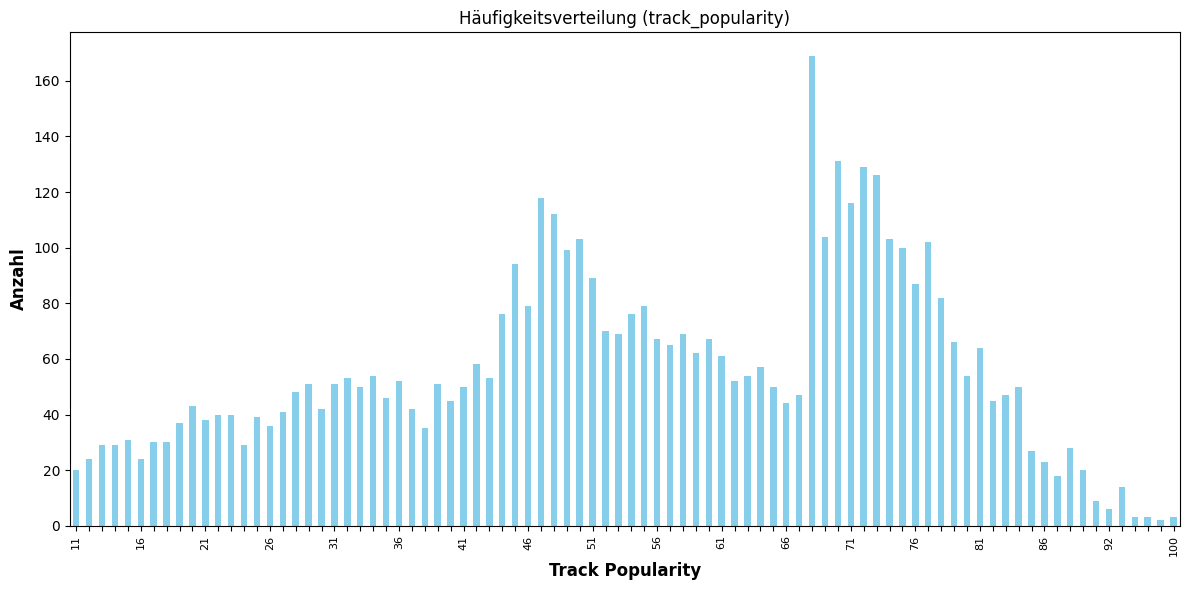

In [32]:
vc = songs_df['track_popularity'].value_counts().sort_index()

# Plot
ax = vc.plot(
    kind='bar',
    figsize=(12, 6),
    color='skyblue',
    title='Häufigkeitsverteilung (track_popularity)'
)

# Nur jeden 5. Tick auf der X-Achse anzeigen
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

# Setze jeden 5. Tick sichtbar, Rest leer
new_labels = [label.get_text() if i % 5 == 0 else '' for i, label in enumerate(xticklabels)]
ax.set_xticklabels(new_labels, rotation=90, fontsize=8)

# Achsentitel etc.
plt.xlabel('Track Popularity', fontsize=12, fontweight='bold')
plt.ylabel('Anzahl', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

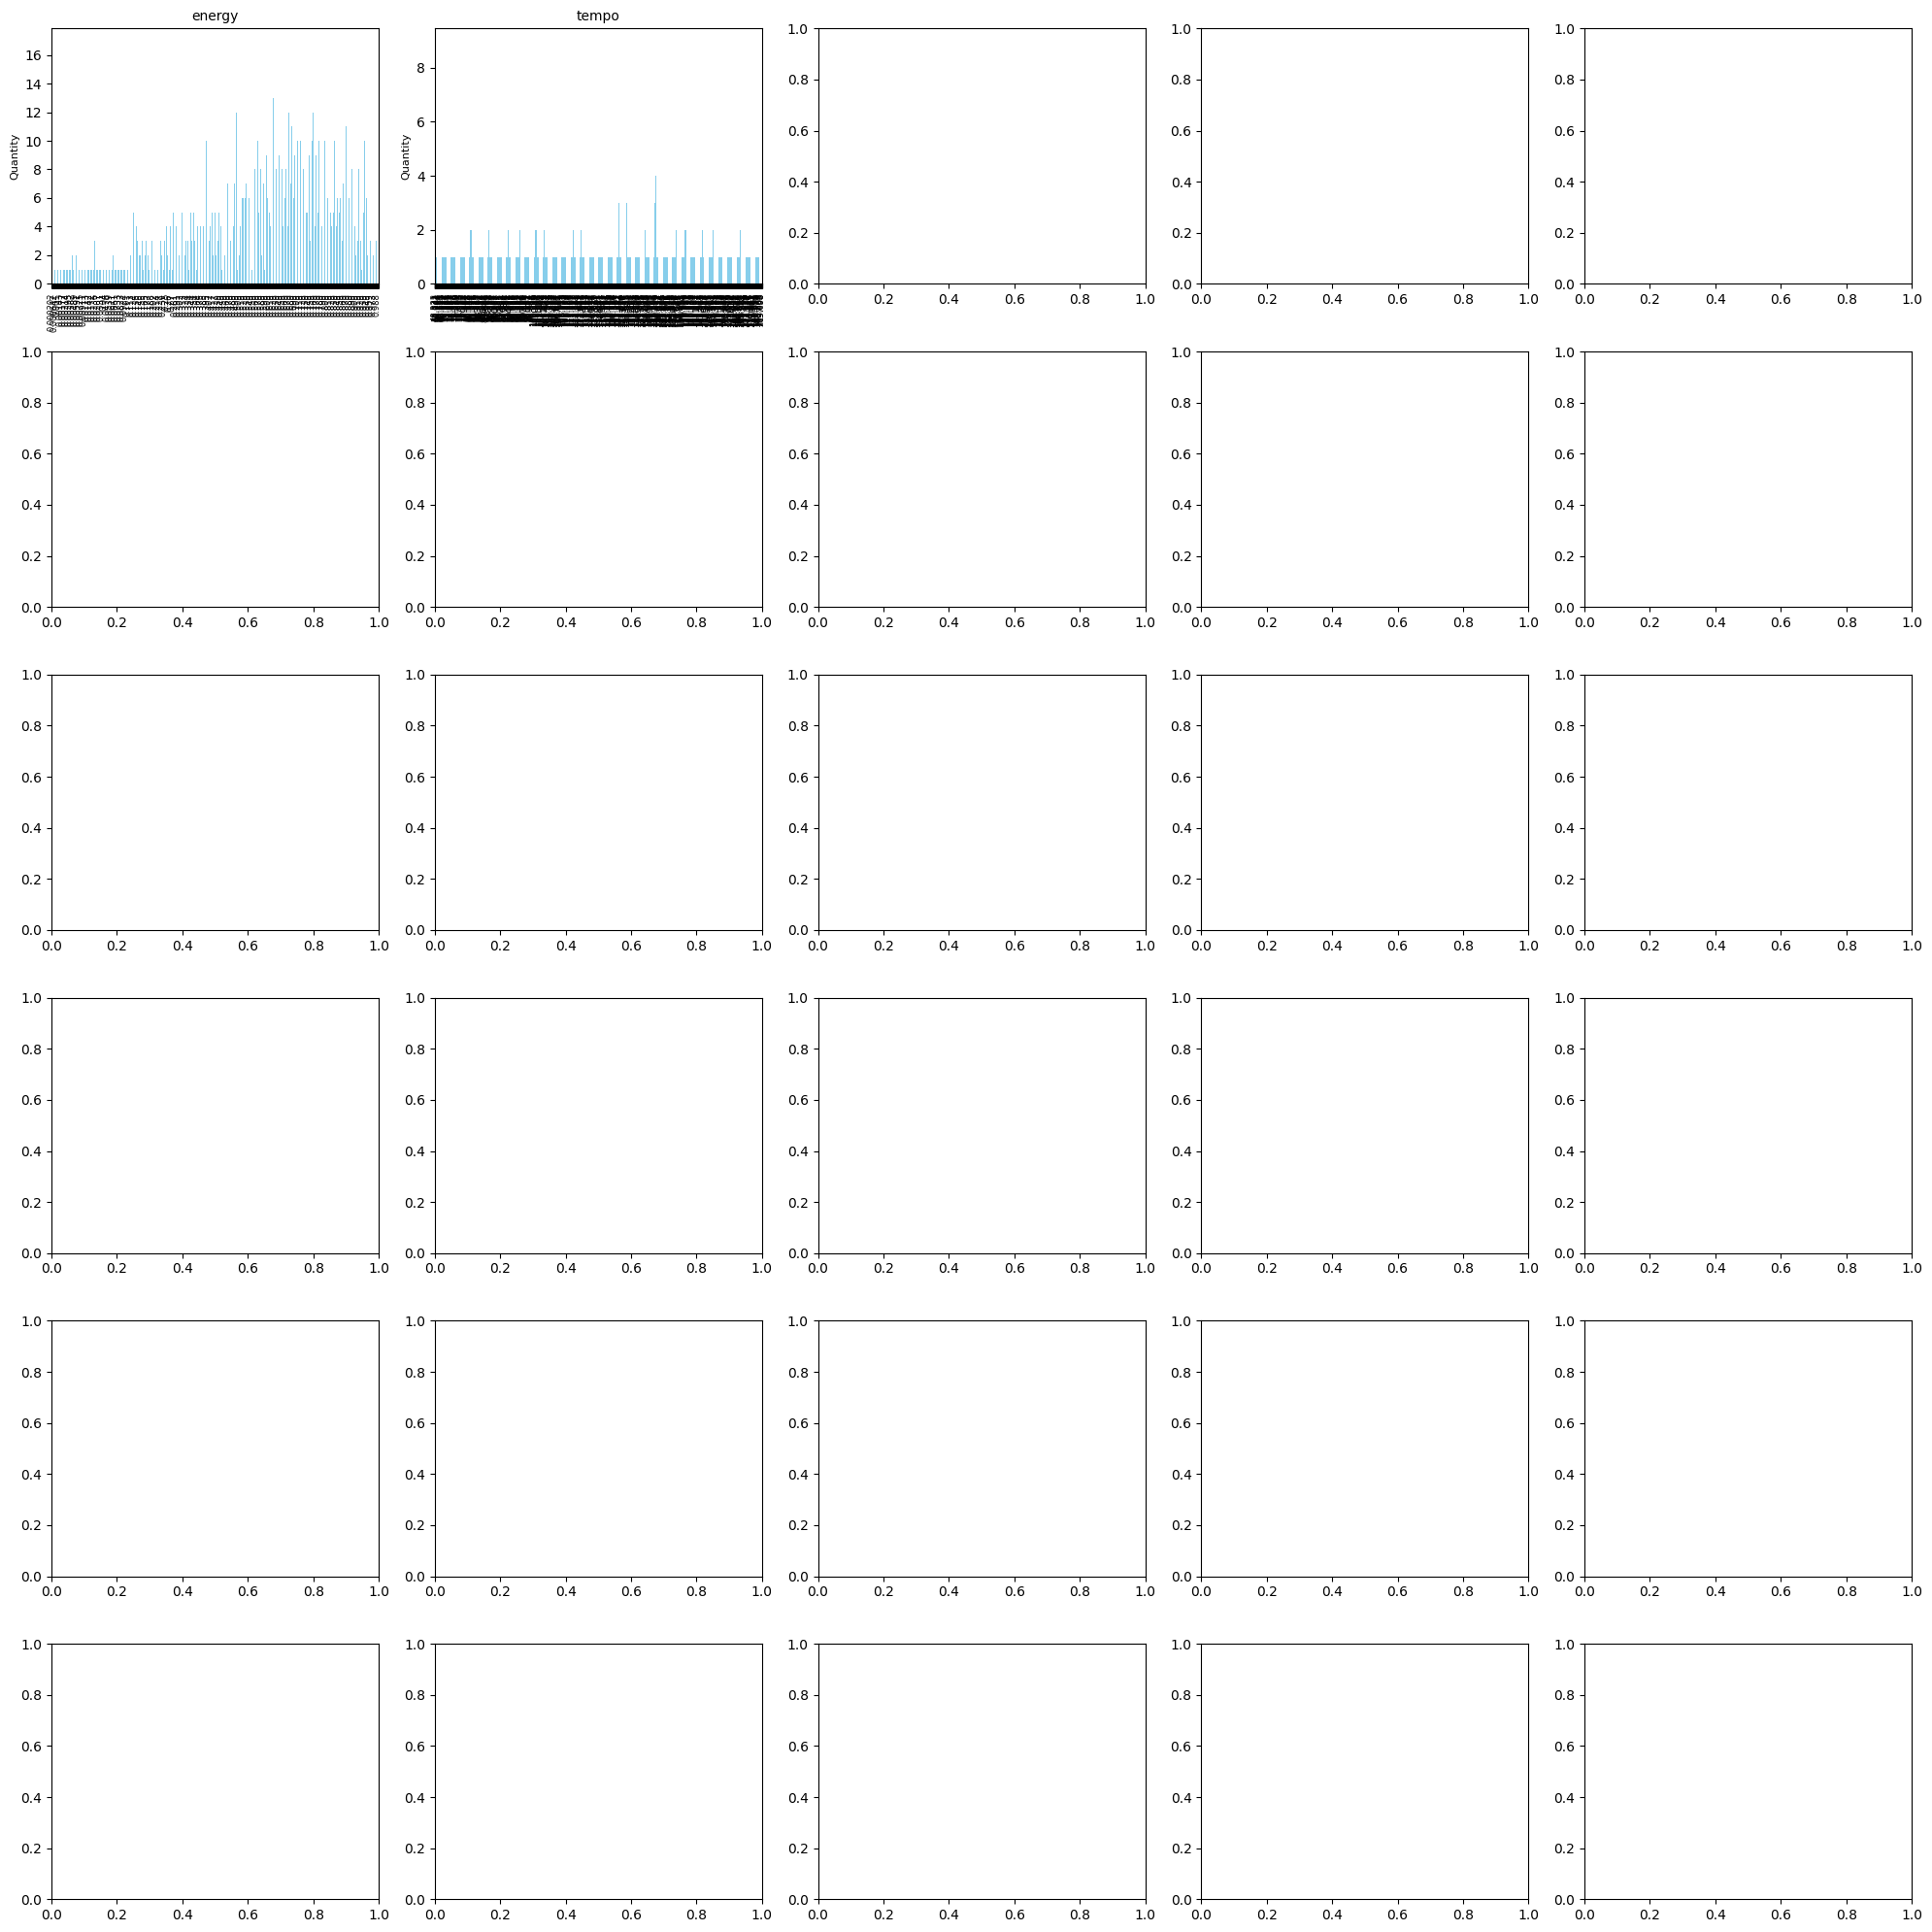

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional: CSV laden
# songs_df = pd.read_csv('deine_datei.csv')

# Anzahl der Spalten & Grid definieren
cols = songs_df.columns[:2]
n = len(cols)
n_rows, n_cols = 6, 5  # Grid 6x5 → max. 30 Plots

# Plotgröße anpassen
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

# Alle Spalten durchgehen
for i, col in enumerate(cols):
    ax = axes[i]
    try:
        vc = songs_df[col].value_counts().sort_index()
        vc.plot(kind='bar', ax=ax, color='skyblue')

        # Nur jeden 5. Tick anzeigen
        xticklabels = vc.index.astype(str)
        new_labels = [label if j % 10 == 0 else '' for j, label in enumerate(xticklabels)]
        ax.set_xticks(range(len(vc)))
        ax.set_xticklabels(new_labels, rotation=90, fontsize=6)

        ax.set_title(f'{col}', fontsize=10)
        ax.set_ylabel('Quantity', fontsize=8)
        ax.set_xlabel('')
    except Exception as e:
        ax.set_title(f'{col} (Fehler: {e})')
        ax.axis('off')

# Leere Plots ausblenden, falls weniger als 30 Features
# for i in range(n, n_rows * n_cols):
#     axes[i].axis('off')

plt.tight_layout()
plt.show()
